# 🔍 Finding the SIFT keypoints and descriptors

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Let's first create our SIFT features extractor

In [3]:
sift = cv.SIFT_create()

<h4>Loading images in RGB Colorspace</h4>

In [4]:
train_img = cv.imread('../images/train.jpg')
query_img = cv.imread('../images/query.jpg')

<h4>Changing input image in 8-bit grayscale image</h4>

In [5]:
gray_train = cv.cvtColor(train_img,cv.COLOR_BGR2GRAY)
gray_query = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY)

<Figure size 7200x7200 with 0 Axes>

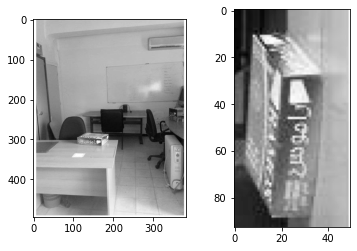

In [6]:
plt.figure(figsize=(100,100))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_train,cmap='gray')
ax2.imshow(gray_query,cmap='gray')

<h4>Detects keypoints and computes their descriptors</h4>

In [7]:
kp_train, desc_train = sift.detectAndCompute(gray_train, None)
kp_query, desc_query = sift.detectAndCompute(gray_query, None)

In [8]:
desc_train.shape

(362, 128)

<h4>Drawing the keypoints onto the images</h4>

In [9]:
result_query = cv.drawKeypoints(gray_query, kp_query, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result_train = cv.drawKeypoints(gray_train, kp_train, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

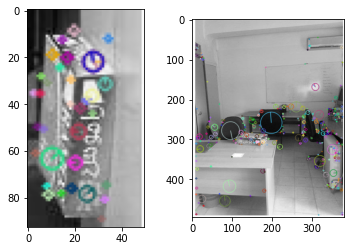

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(result_query,cmap='gray')
ax2.imshow(result_train,cmap='gray')

# 🔧Feature Matching

To match SIFT features in one image with others, we may use the Brute-Force matcher in OpenCV.

**Brute-Force Matcher**
Takes the descriptor of one feature in first set and is matched with all other features in
second set using some distance calculation. The closest one is returned.




In [12]:
matches = cv.BFMatcher().knnMatch(desc_query,desc_train, k=2)

Here, we choose the best matches.

In [13]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [15]:
comparaison = cv.drawMatchesKnn(gray_query,kp_query,gray_train,kp_train,good,None,flags=2)

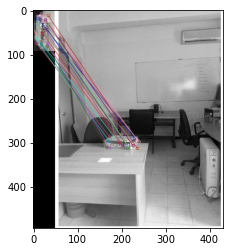

In [16]:
plt.imshow(comparaison)